In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

df = pd.read_csv("../data/raw/support_tickets.csv")
df.head(10)


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
5,6,Rebecca Fleming,sheenasmith@example.com,53,Male,Microsoft Office,2020-07-28,Cancellation request,Payment issue,I'm facing a problem with my {product_purchase...,Open,NaN,Low,Social media,NaN,NaN,NaN
6,7,Jacqueline Wright,donaldkeith@example.org,24,Other,Microsoft Surface,2020-02-23,Product inquiry,Refund request,I'm unable to access my {product_purchased} ac...,Open,NaN,Critical,Social media,NaN,NaN,NaN
7,8,Denise Lee,joelwilliams@example.com,23,Male,Philips Hue Lights,2020-08-09,Refund request,Battery life,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Social media,NaN,NaN,NaN
8,9,Nicolas Wilson,joshua24@example.com,60,Other,Fitbit Versa Smartwatch,2020-07-16,Technical issue,Installation support,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Low,Social media,2023-06-01 10:32:47,NaN,NaN
9,10,William Dawson,clopez@example.com,27,Male,Dyson Vacuum Cleaner,2020-03-06,Refund request,Payment issue,My {product_purchased} is making strange noise...,Pending Customer Response,NaN,Critical,Phone,2023-06-01 09:25:48,NaN,NaN


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [4]:
df.isna().sum().sort_values(ascending=False)


Customer Satisfaction Rating    5700
Resolution                      5700
Time to Resolution              5700
First Response Time             2819
Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Ticket Subject                     0
Ticket Type                        0
Date of Purchase                   0
Product Purchased                  0
Ticket Priority                    0
Ticket Status                      0
Ticket Description                 0
Ticket Channel                     0
dtype: int64

In [5]:
df.rename(columns={
    "Ticket Description": "ticket_text",
    "Ticket Type": "category",
    "Ticket Priority": "priority",
    "Ticket Channel": "channel",
    "First Response Time": "first_response_time"
}, inplace=True)


In [6]:
df = df.dropna(subset=["ticket_text", "priority"])

df.shape


(8469, 17)

In [7]:
df["ticket_length"] = df["ticket_text"].apply(
    lambda x: len(str(x).split())
)


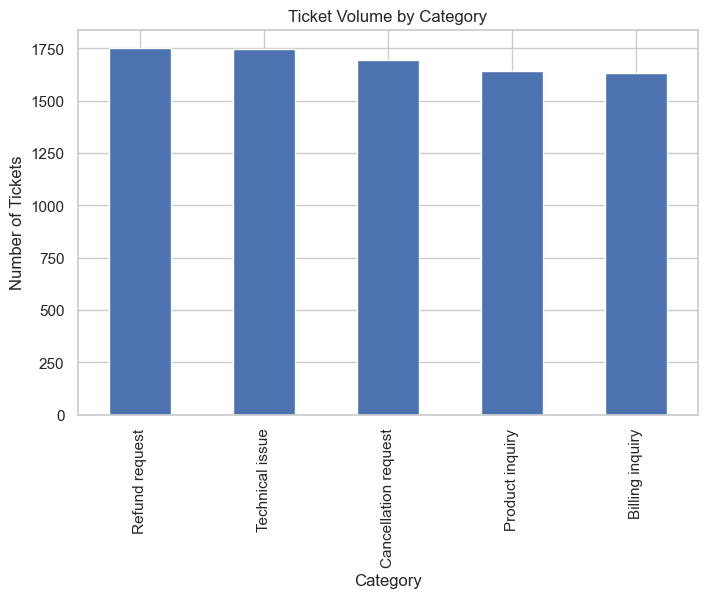

Text(0.5, 0, 'Category')

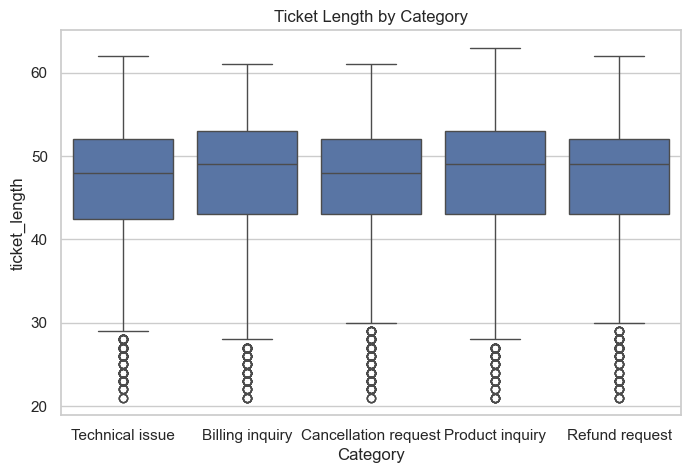

In [8]:
df["category"].value_counts().plot(kind="bar")
plt.title("Ticket Volume by Category")
plt.xlabel("Category")
plt.ylabel("Number of Tickets")
plt.show()
sns.boxplot(x="category", y="ticket_length", data=df)
plt.title("Ticket Length by Category")
plt.xlabel("Category")

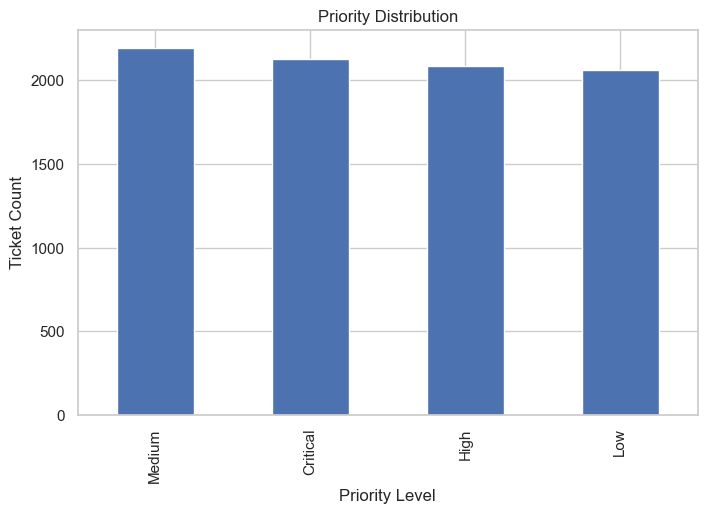

Text(0.5, 0, 'Priority Level')

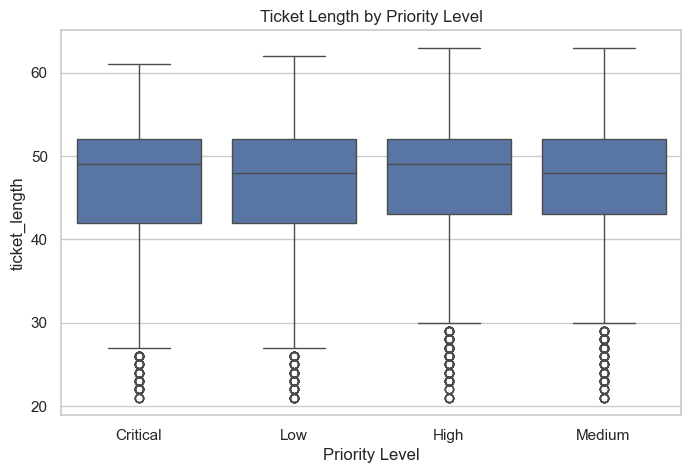

In [9]:
df["priority"].value_counts().plot(kind="bar")
plt.title("Priority Distribution")
plt.xlabel("Priority Level")
plt.ylabel("Ticket Count")
plt.show()
sns.boxplot(x="priority", y="ticket_length", data=df)
plt.title("Ticket Length by Priority Level")
plt.xlabel("Priority Level") 

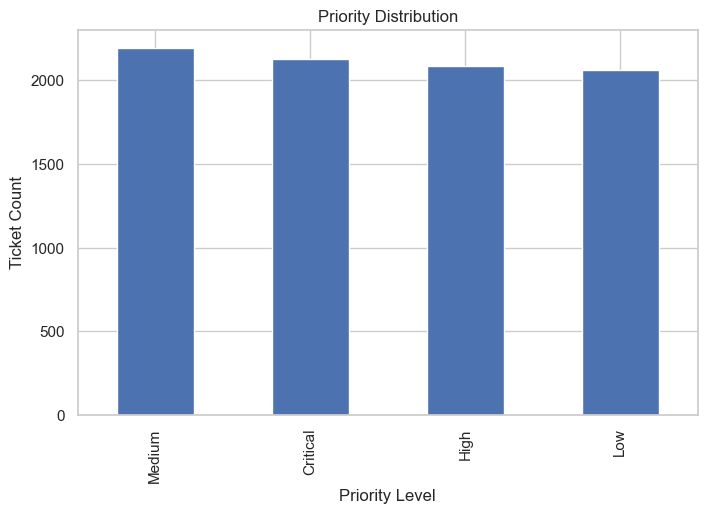

In [21]:
df["priority"].value_counts().plot(kind="bar")
plt.title("Priority Distribution")
plt.xlabel("Priority Level")
plt.ylabel("Ticket Count")
plt.show()



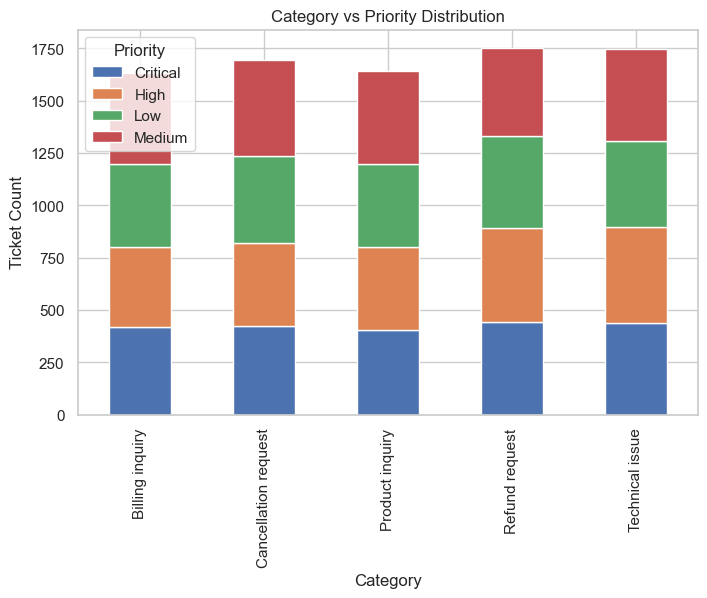

In [16]:
pd.crosstab(df["category"], df["priority"]).plot(
    kind="bar", stacked=True
)
plt.title("Category vs Priority Distribution")
plt.xlabel("Category")
plt.ylabel("Ticket Count")
plt.legend(title="Priority")
plt.show()



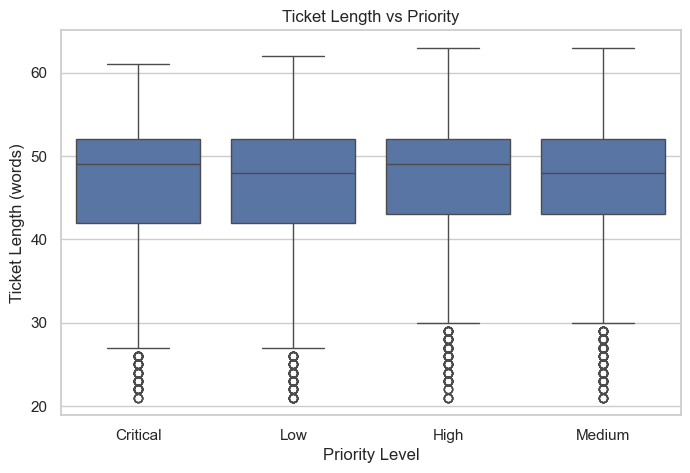

In [22]:
sns.boxplot(x="priority", y="ticket_length", data=df)
plt.title("Ticket Length vs Priority")
plt.xlabel("Priority Level")
plt.ylabel("Ticket Length (words)")
plt.show()


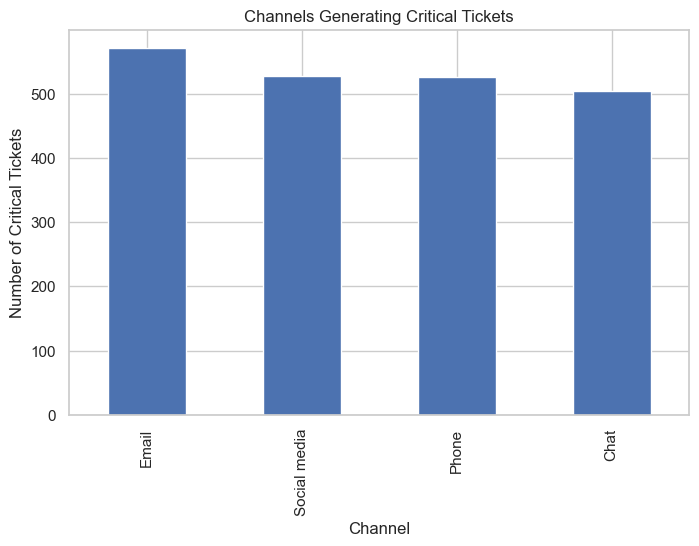

In [23]:
critical_df = df[df["priority"] == "Critical"]

critical_df["channel"].value_counts().plot(kind="bar")
plt.title("Channels Generating Critical Tickets")
plt.xlabel("Channel")
plt.ylabel("Number of Critical Tickets")
plt.show()


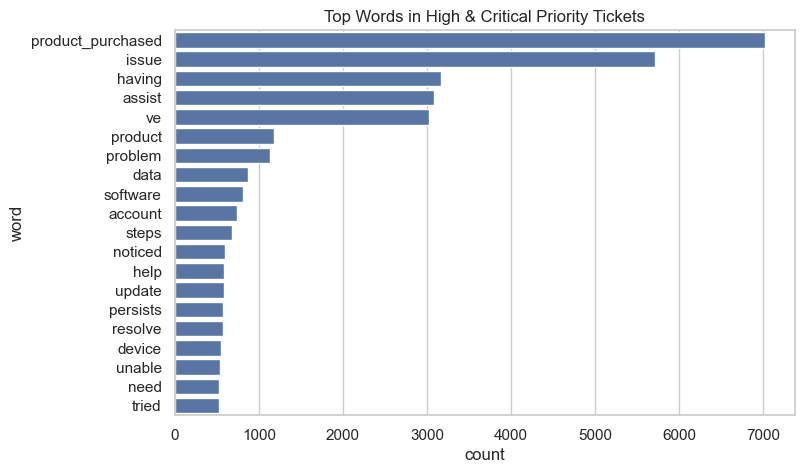

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

high_df = df[df["priority"].isin(["High", "Critical"])]

cv = CountVectorizer(
    stop_words="english",
    max_features=20
)

word_matrix = cv.fit_transform(high_df["ticket_text"])

word_freq = pd.DataFrame({
    "word": cv.get_feature_names_out(),
    "count": word_matrix.sum(axis=0).A1
}).sort_values(by="count", ascending=False)

sns.barplot(x="count", y="word", data=word_freq)
plt.title("Top Words in High & Critical Priority Tickets")
plt.show()


## 🔍 Key Insights (Day 1)

- Technical and billing-related issues dominate overall support volume.
- High and critical priority tickets are relatively rare, creating a natural class imbalance.
- Certain categories consistently generate urgent tickets, posing higher SLA risk.
- High-priority tickets tend to be longer and more detailed.
- Specific channels contribute disproportionately to critical issues.
- Urgency-related keywords frequently appear in high-priority ticket descriptions.
